<a href="https://colab.research.google.com/github/macord1/Final-Project/blob/master/Sree_RFE_Project3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# INSTALLING AND READING DATASET FROM KAGGLE

## READING DATASET

Refer this link to learn how to work with kaggle datast - https://towardsdatascience.com/setting-up-kaggle-in-google-colab-ebb281b61463


Also, don't forget to upload your kaggle.json file to the session storage (see the folder icon on the left).

In [ ]:
# downloading kaggle dataset

!pip install kaggle
!mkdir .kaggle

import json
token = {"username":"sreelakshmisunil","key":"c512f47389da050eebadc86194852d7f"}
# enter your info here


mkdir: cannot create directory ‘.kaggle’: File exists


In [ ]:
with open('/content/.kaggle/kaggle.json', 'w') as file:
    json.dump(token, file)

In [ ]:
!cp /content/.kaggle/kaggle.json ~/.kaggle/kaggle.json
!kaggle config set -n path -v{/content}


- path is now set to: {/content}


In [ ]:
!chmod 600 /root/.kaggle/kaggle.json
!kaggle datasets list

ref                                                     title                                              size  lastUpdated          downloadCount  
------------------------------------------------------  -----------------------------------------------  ------  -------------------  -------------  
unanimad/us-election-2020                               US Election 2020                                  429KB  2020-11-16 22:16:00           4655  
manchunhui/us-election-2020-tweets                      US Election 2020 Tweets                           353MB  2020-11-09 18:51:59           2473  
antgoldbloom/covid19-data-from-john-hopkins-university  COVID-19 data from John Hopkins University          2MB  2020-11-16 06:04:17           1694  
headsortails/us-election-2020-presidential-debates      US Election 2020 - Presidential Debates           199MB  2020-10-23 16:56:10            451  
etsc9287/2020-general-election-polls                    Election, COVID, and Demographic Data by Cou

Trying to read the images directly from the link
(Refer to image processing and segmentation colab files from lecture).
***I'm gonna try the 1st dataset in the example - CT lung, it seems easier to understand.***


In [ ]:
# acessing CT lung dataset
! kaggle datasets download -d andrewmvd/covid19-ct-scans -p /content

 98% 1.02G/1.03G [00:07<00:00, 211MB/s]
100% 1.03G/1.03G [00:07<00:00, 145MB/s]


In [ ]:
# unzipping the data
!unzip \*.zip

Archive:  covid19-ct-scans.zip
  inflating: ct_scans/coronacases_org_001.nii  
  inflating: ct_scans/coronacases_org_002.nii  
  inflating: ct_scans/coronacases_org_003.nii  
  inflating: ct_scans/coronacases_org_004.nii  
  inflating: ct_scans/coronacases_org_005.nii  
  inflating: ct_scans/coronacases_org_006.nii  
  inflating: ct_scans/coronacases_org_007.nii  
  inflating: ct_scans/coronacases_org_008.nii  
  inflating: ct_scans/coronacases_org_009.nii  
  inflating: ct_scans/coronacases_org_010.nii  
  inflating: ct_scans/radiopaedia_org_covid-19-pneumonia-10_85902_1-dcm.nii  
  inflating: ct_scans/radiopaedia_org_covid-19-pneumonia-10_85902_3-dcm.nii  
  inflating: ct_scans/radiopaedia_org_covid-19-pneumonia-14_85914_0-dcm.nii  
  inflating: ct_scans/radiopaedia_org_covid-19-pneumonia-27_86410_0-dcm.nii  
  inflating: ct_scans/radiopaedia_org_covid-19-pneumonia-29_86490_1-dcm.nii  
  inflating: ct_scans/radiopaedia_org_covid-19-pneumonia-29_86491_1-dcm.nii  
  inflating: ct_scans


# UNDERSTANDING A SAMPLE CT DATA

Just followed the tutorial on this kaggle site to read and view results of one of the CTs. There is a total of 20 CT data in here.

In [ ]:
# importing the modules
import glob
import pandas  as pd
import numpy   as np
import nibabel as nib # to read nii data
import matplotlib.pyplot as plt

Metadata2 contains modified version of metadata file. I deleted the "../input/covid19-ct-scans/ " part from the filepaths in the csv file. I've uploaded this edited file to the shared project 3 drive folder.

In [ ]:
# Read and examine metadata
raw_data = pd.read_csv('metadata2.csv')
raw_data.sample(5)

,ct_scan,lung_mask,infection_mask,lung_and_infection_mask
18,ct_scans/radiopaedia_org_covid-19-pneumonia-4_...,lung_mask/radiopaedia_4_85506_1.nii,infection_mask/radiopaedia_4_85506_1.nii,lung_and_infection_mask/radiopaedia_4_85506_1.nii
14,ct_scans/radiopaedia_org_covid-19-pneumonia-29...,lung_mask/radiopaedia_29_86490_1.nii,infection_mask/radiopaedia_29_86490_1.nii,lung_and_infection_mask/radiopaedia_29_86490_1...
10,ct_scans/radiopaedia_org_covid-19-pneumonia-10...,lung_mask/radiopaedia_10_85902_1.nii,infection_mask/radiopaedia_10_85902_1.nii,lung_and_infection_mask/radiopaedia_10_85902_1...
12,ct_scans/radiopaedia_org_covid-19-pneumonia-14...,lung_mask/radiopaedia_14_85914_0.nii,infection_mask/radiopaedia_14_85914_0.nii,lung_and_infection_mask/radiopaedia_14_85914_0...
16,ct_scans/radiopaedia_org_covid-19-pneumonia-36...,lung_mask/radiopaedia_36_86526_0.nii,infection_mask/radiopaedia_36_86526_0.nii,lung_and_infection_mask/radiopaedia_36_86526_0...


In [ ]:
def read_nii(filepath):
    '''
    Reads .nii file and returns pixel array
    '''
    ct_scan = nib.load(filepath)
    array   = ct_scan.get_fdata()
    array   = np.rot90(np.array(array))
    return(array)

In [ ]:
# Read sample data (1st CT data)
sample_ct   = read_nii(raw_data.loc[0,'ct_scan'])
sample_lung = read_nii(raw_data.loc[0,'lung_mask'])
sample_infe = read_nii(raw_data.loc[0,'infection_mask'])
sample_all  = read_nii(raw_data.loc[0,'lung_and_infection_mask'])

In [ ]:
# Examine Shape
sample_ct.shape  # ie. 512 x 512 resolution and 301 slices

(512, 512, 301)

In [ ]:
# inspecting images and available annotations
def plot_sample(array_list, color_map = 'inferno'):
    '''
    Plots and a slice with all available annotations
    '''
    fig = plt.figure(figsize=(18,15))

    plt.subplot(1,4,1)
    plt.imshow(array_list[0], cmap='gray')
    plt.title('Original Image')

    plt.subplot(1,4,2)
    plt.imshow(array_list[0], cmap='gray')
    plt.imshow(array_list[1], alpha=0.4, cmap=color_map)
    plt.title('Truth - Lung Mask')

    plt.subplot(1,4,3)
    plt.imshow(array_list[0], cmap='gray')
    plt.imshow(array_list[2], alpha=0.4, cmap=color_map)
    plt.title('Truth - Infection Mask')

    plt.subplot(1,4,4)
    plt.imshow(array_list[0], cmap='gray')
    plt.imshow(array_list[3], alpha=0.4, cmap=color_map)
    plt.title('Truth - Lung and Infection Mask')

    plt.show()

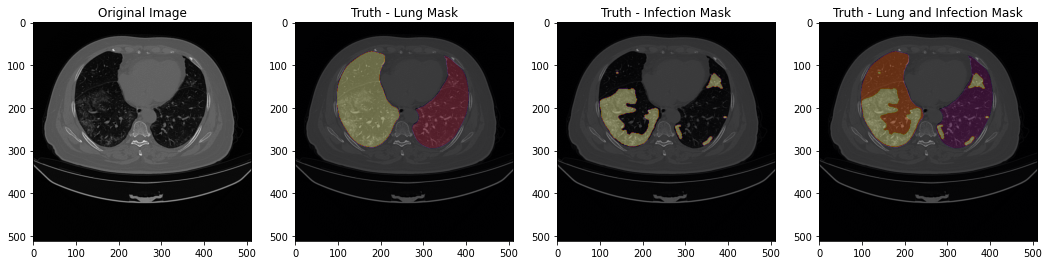

In [ ]:
# Examine one slice of a ct scan and its annotations
plot_sample([sample_ct[...,120], sample_lung[...,120], sample_infe[...,120], sample_all[...,120]])

In [ ]:
# Examining multiple slices from the same exam

def bulk_plot_sample(array_list, index_list):
    '''
    Plots multiple slices, wrapper of plot_sample
    '''
    for index_value in index_list:
        plot_sample([array_list[0][...,index_value], array_list[1][...,index_value], array_list[2][...,index_value], array_list[3][...,index_value]])

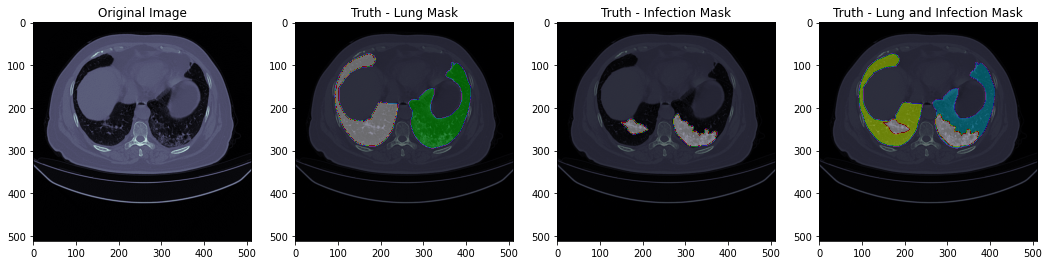

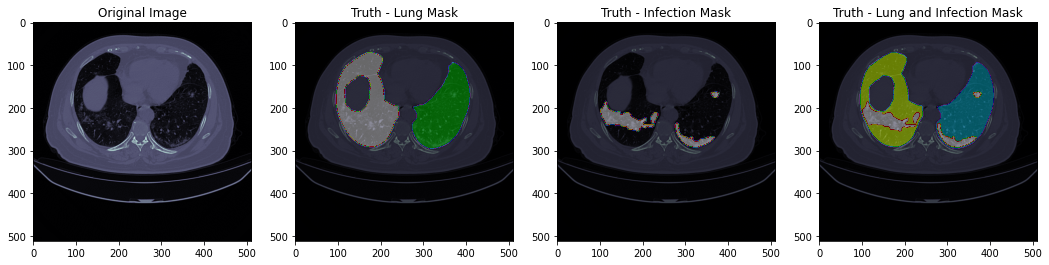

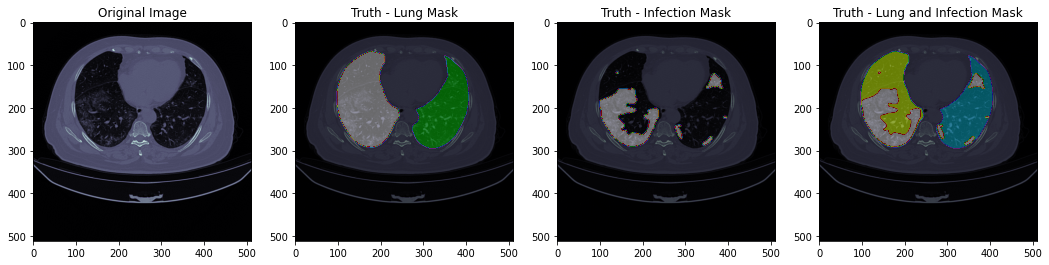

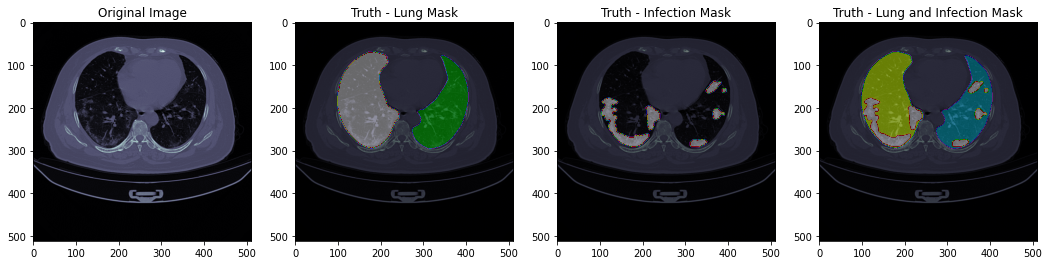

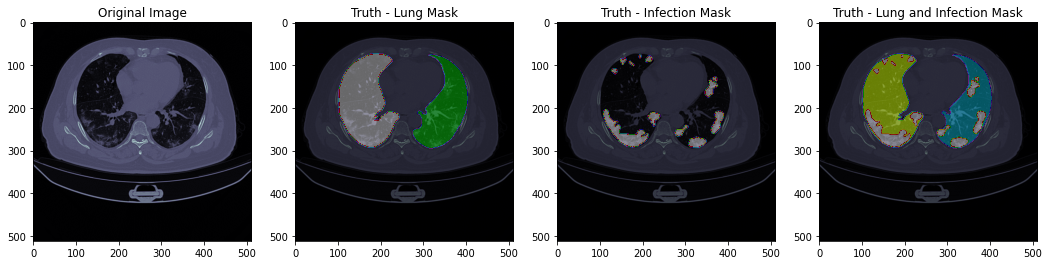

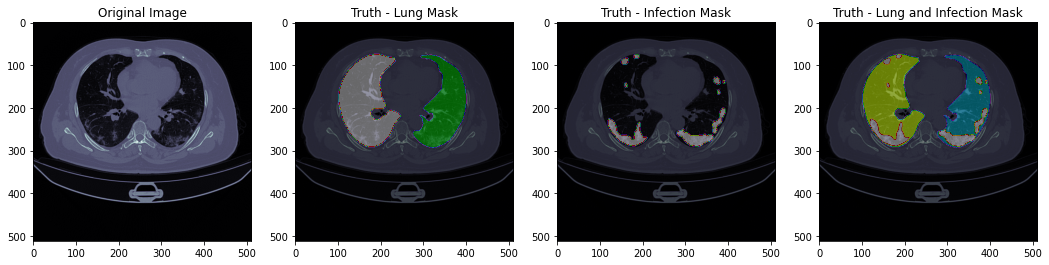

In [ ]:
# Examine multiple slices of a ct scan and its annotations
bulk_plot_sample([sample_ct, sample_lung, sample_infe, sample_all], index_list=[100,110,120,130,140,150])


# IMAGE SEGMENTATION

IMAGE PROCESSING - plotting single slice and a histogram with multiple intensities.

In [ ]:
# inspecting images and available annotations
def plot_sample_edited(array_list, color_map = 'nipy_spectral'):
    '''
    Plots and a slice with all available annotations
    '''
    fig = plt.figure(figsize=(18,15))

    plt.subplot(1,4,1)
    plt.imshow(array_list[0], cmap='gray')
    plt.title('Original Image')

    plt.subplot(1,4,2)
    plt.imshow(array_list[0], cmap='gray')
    plt.imshow(array_list[1], alpha=0.5, cmap=color_map)
    plt.title('Lung Mask')

    plt.subplot(1,4,3)
    plt.imshow(array_list[0], cmap='gray')
    plt.imshow(array_list[2], alpha=0.5, cmap=color_map)
    plt.title('Infection Mask')

    plt.subplot(1,4,4)
    plt.imshow(array_list[0], cmap='gray')
    plt.imshow(array_list[3], alpha=0.5, cmap=color_map)
    plt.title('Lung and Infection Mask')

    plt.show()

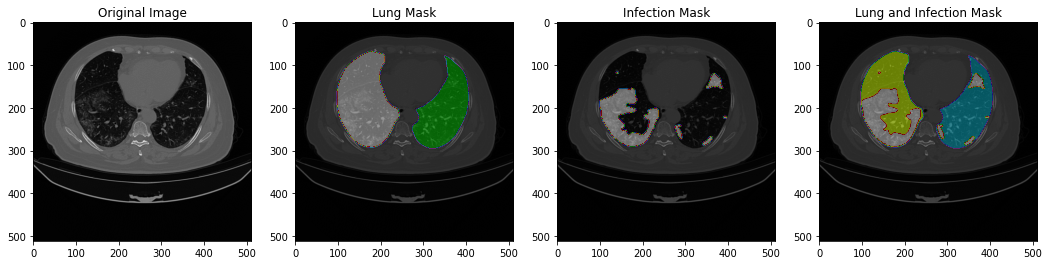

In [ ]:
# plotting 120th slice of 1st ct scan

plot_sample_edited([sample_ct[...,120], sample_lung[...,120], sample_infe[...,120], sample_all[...,120]])

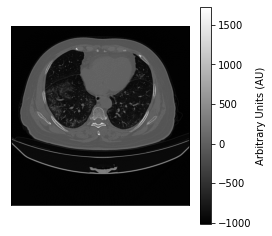

In [ ]:
#plotting orginal image - 120th slice of 1st CT scan
#array_list = [sample_ct[...,120], sample_lung[...,120], sample_infe[...,120], sample_all[...,120]]
fig, ax = plt.subplots(figsize=[4,4])
im = ax.imshow(sample_ct[...,120], cmap='gray')
ax.set_xticks([])
ax.set_yticks([])
cbar = fig.colorbar(im, label='Arbitrary Units (AU)')

In [ ]:
# ploting axial slice with signal intensity
import ipywidgets

image = sample_ct[...,120]
@ipywidgets.interact(window=(image.min(),image.max()), level=(image.min(),image.max()))
def imshow(window, level):
    cmin = level - window / 2
    cmax = level + window / 2
    fig, axs = plt.subplots(ncols=2, figsize=[9,4])

    # left axis
    axs[0].hist(np.ravel(image), bins=20)
    axs[0].axvline(cmin, color='C1')
    axs[0].axvline(cmax, color='C1')
    axs[0].set_xlabel('Intensity')
    axs[0].set_ylabel('Count')
    axs[0].plot((0,cmin), (0, 0), color='red')
    axs[0].plot((cmin,cmax), (0, 8000), color='red')
    axs[0].plot((cmax,150), (8000, 8000), color='red')

    # right axis
    im = axs[1].imshow(image, cmap='gray', clim=[cmin,cmax])
    axs[1].set_xticks([])
    axs[1].set_yticks([])
    cbar = fig.colorbar(im, label='Intensity (AU)')

interactive(children=(FloatSlider(value=352.0, description='window', max=1725.0, min=-1021.0), FloatSlider(val…

In [ ]:
@ipywidgets.interact(threshold=(image.min(), image.max()))
def threshold(threshold=np.percentile(image, 75)):
    thresholded = image < threshold
    fig, axs = plt.subplots(ncols=2, figsize=[9,4])

    # left axis
    axs[0].hist(np.ravel(image), bins=50)
    axs[0].axvline(threshold, color='C1')
    axs[0].set_xlabel('Intensity')
    axs[0].set_ylabel('Count')

    # right axis
    im = axs[1].imshow(thresholded, cmap='gray')
    axs[1].set_xticks([])
    axs[1].set_yticks([])

interactive(children=(FloatSlider(value=-104.0, description='threshold', max=1725.0, min=-1021.0), Output()), …

In [ ]:
# define imstrip function

def imstrip(images, **imshow_args):
    """View multiple images side by side."""
    import numpy as np
    from matplotlib import pyplot as plt
    from mpl_toolkits.axes_grid1 import ImageGrid
    fig = plt.figure(figsize=[5*len(images),4])
    axs = ImageGrid(fig, 111, nrows_ncols=[1,len(images)], axes_pad=0.9, cbar_mode='each', cbar_pad=0.1)
    for i, image in enumerate(images):
        kwargs = imshow_args.copy()
        kwargs.setdefault('cmap', 'gray')
        kwargs.setdefault('clim', np.percentile(image, [1,99]))
        im = axs[i].imshow(image, **kwargs)
        axs[i].set_xticks([])
        axs[i].set_yticks([])
        fig.colorbar(im, cax=axs.cbar_axes[i])
    return axs

Discretized image with multiple thresholds

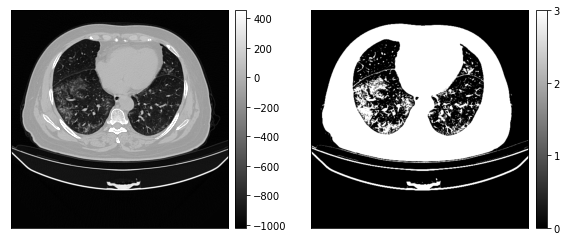

In [ ]:
thresholds = -790, -720, -650

thresholded = np.zeros_like(image)
thresholded[image < thresholds[0]] = 0
thresholded[np.logical_and(image > thresholds[0], image < thresholds[1])] = 1
thresholded[np.logical_and(image > thresholds[1], image < thresholds[2])] = 2
thresholded[image > thresholds[2]] = 3

axs = imstrip([image, thresholded])
axs[1].images[0].colorbar.set_ticks([0, 1, 2, 3])

SEGMENTATION

STRIPPING UNWANTED AREAS - all soft tissue around lungs

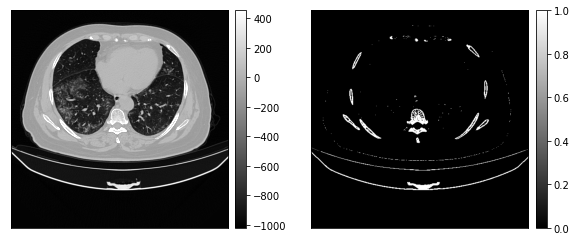

In [ ]:
# thresholding unwanted bone tissue
bone_tissue = image > 150
axs = imstrip([image, bone_tissue])

CONNECTED COMPONENT LABELLING

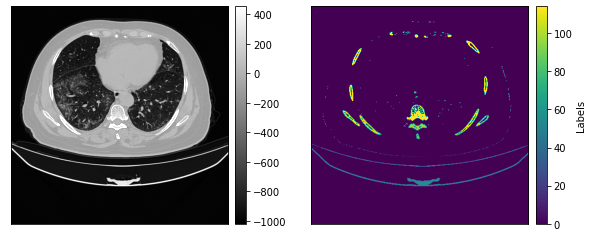

In [ ]:
from skimage.morphology import label

labels = label(bone_tissue, connectivity=2)

labels = labels.max() - labels  # invert label values
labels[labels == labels.max()] = 0  # reset background label to zero

axs = imstrip([image, labels])
axs[1].images[0].set_cmap('viridis')
axs[1].images[0].colorbar.set_label('Labels')
pass

Binary dilation

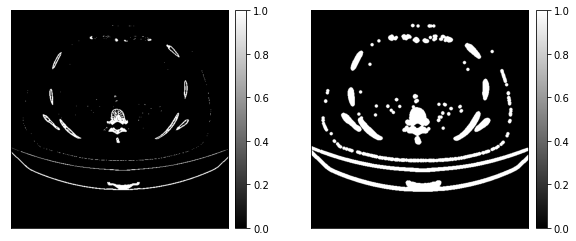

In [ ]:
from skimage.morphology import binary_dilation, disk

bonetissue_plus = binary_dilation(bone_tissue, disk(4))

axs = imstrip([bone_tissue, bonetissue_plus])

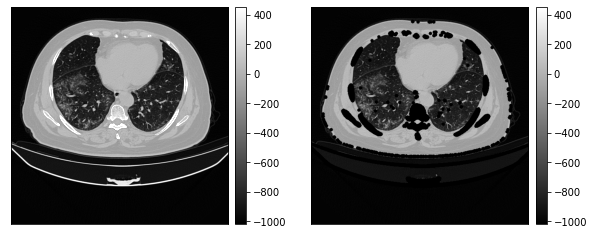

In [ ]:
# applying bone mask
lungs = image.copy()  # don't modify the input!
lungs[bonetissue_plus == 1] = lungs.min()
axs = imstrip([image, lungs], clim=np.percentile(image, [1,99]))
# bone tissue is the mask for bones

In [ ]:
# wrapping up for bone mask
def strip_bone(image, threshold=150, dilation=4):
    """Threshold-based bone stripping."""
    bone_tissue = image > threshold
    bonetissue_plus = binary_dilation(bone_tissue, disk(dilation))
    lungs = image.copy()
    lungs[bonetissue_plus == 1] = lungs.min()
    #lungs[bone_tissue == 1] = lungs.min()
    return lungs

Trying to remove soft tissue

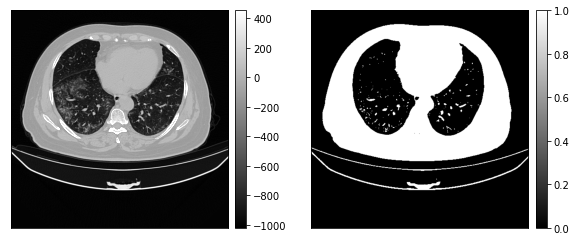

In [ ]:
soft_tissue = image > -300
axs = imstrip([image, soft_tissue])

Use regionprops to sort labels by their area and select the largest label

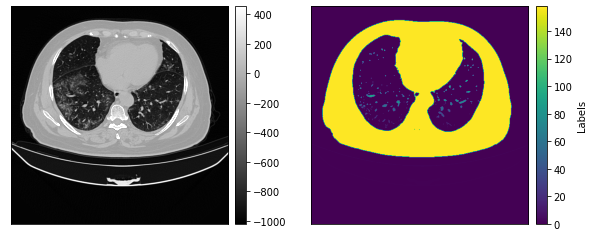

In [ ]:
from skimage.morphology import label

labels = label(soft_tissue, connectivity=2)

labels = labels.max() - labels  # invert label values
labels[labels == labels.max()] = 0  # reset background label to zero

axs = imstrip([image, labels])
axs[1].images[0].set_cmap('viridis')
axs[1].images[0].colorbar.set_label('Labels')
pass

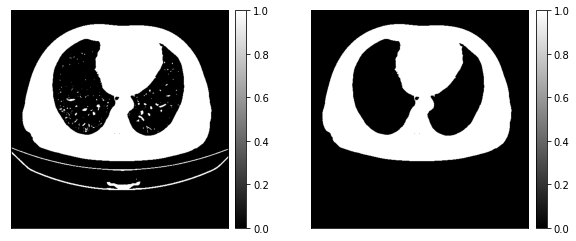

In [ ]:
# selecting largest label
from skimage.measure import regionprops

props = regionprops(labels)
indices = np.argsort([prop.area for prop in props]) + 1
other = (labels == indices[-1])

axs = imstrip([soft_tissue, other])

In [ ]:
#organising steps above as a function
def largest_connected_component(image, connectivity=2):
    """Label image and return label with largest area."""
    labels = label(image)
    props = regionprops(labels)
    indices = np.argsort([prop.area for prop in props]) + 1
    return labels == indices[-1]

In [ ]:
# stripping unwanted tissues
def strip_unwanted(image, threshold=-300):
    """Threshold-based skull stripping."""
    soft_tissue = image > threshold
    other = largest_connected_component(soft_tissue)  # defined above
    # binary dilation
    #other_plus = binary_dilation(other, disk(4))
    bonetissue_plus = binary_dilation(bone_tissue, disk(4))
    lungs = image.copy()
    lungs[other == 1] = lungs.min()
    lungs[bone_tissue == 1] = lungs.min()
    #lungs[other_plus == 1] = lungs.min()
    #lungs[bonetissue_plus == 1] = lungs.min()
    return lungs

INFECTION SEGMENTATION

In [ ]:
ti = -750
tl = -250

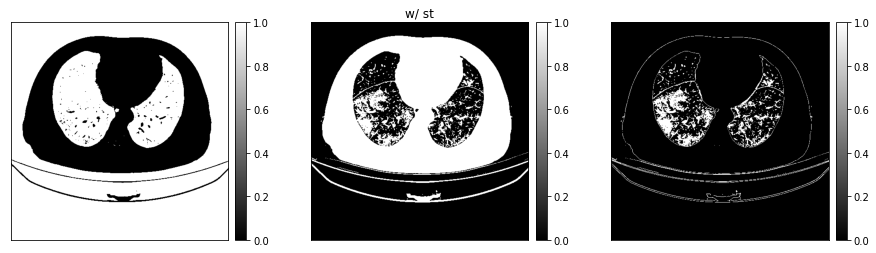

In [ ]:
thresholded1 = image > ti
thresholded2 = strip_unwanted(image) > ti

axs = imstrip([lungs, thresholded1, thresholded2])
axs[1].set_title('w/ st')
axs[2].set_title('')
pass

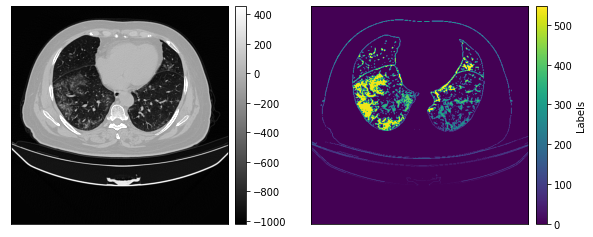

In [ ]:
# connected components labeling 
from skimage.morphology import label

labels = label(thresholded2, connectivity=2)

labels = labels.max() - labels  # invert label values
labels[labels == labels.max()] = 0  # reset background label to zero

axs = imstrip([image, labels])
axs[1].images[0].set_cmap('viridis')
axs[1].images[0].colorbar.set_label('Labels')
pass

In [ ]:
print(np.max(labels))
print(np.min(labels))
print(len(labels))

684
0
512


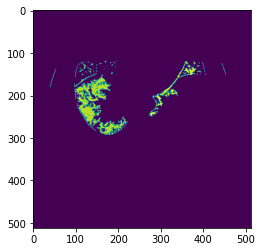

In [ ]:
import copy
mask= copy.deepcopy(labels)

mask[mask<535] = 0 
mask[mask>600] = 0
plt.imshow(mask)

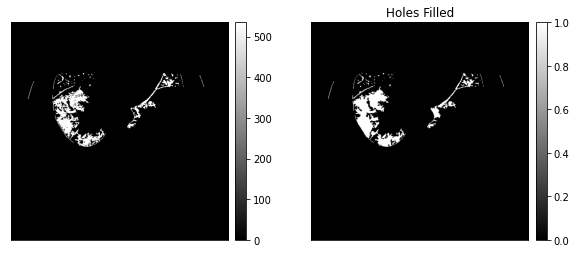

In [ ]:
# cleaning up segmentation
from scipy.ndimage.morphology import binary_fill_holes

#thresholded = strip_unwanted(image) > -710
infection1 = binary_fill_holes(mask)

axs = imstrip([mask, infection1])
axs[1].set_title('Holes Filled')
pass

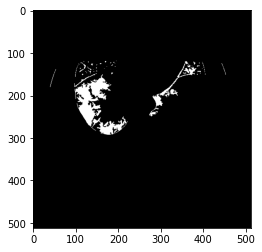

In [ ]:
plt.imshow(infection1,cmap='gray')

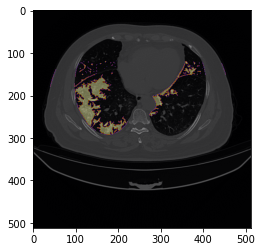

In [ ]:
# mask overlayed on top of orginal image
plt.imshow(image,cmap='gray')
plt.imshow(infection1, cmap = 'inferno',alpha = 0.4)

SEGMENTING LUNGS

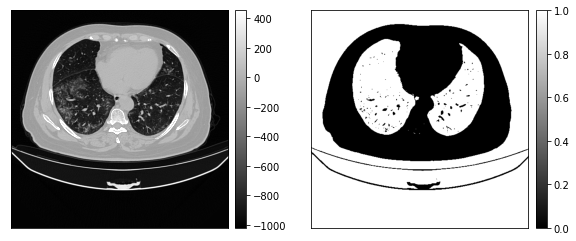

In [ ]:
lungs = image < tl
axs = imstrip([image, lungs])

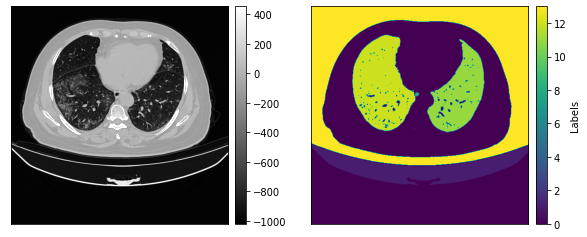

In [ ]:
# connected components labeling 
from skimage.morphology import label

labels = label(lungs, connectivity=2)

labels = labels.max() - labels  # invert label values
labels[labels == labels.max()] = 0  # reset background label to zero

axs = imstrip([image, labels])
axs[1].images[0].set_cmap('viridis')
axs[1].images[0].colorbar.set_label('Labels')
pass

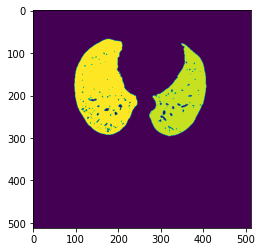

In [ ]:
import copy
lung_mask= copy.deepcopy(labels)

lung_mask[lung_mask<10] = 0 
lung_mask[lung_mask>12] = 0
plt.imshow(lung_mask)

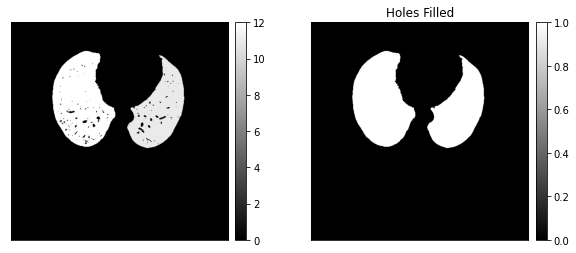

In [ ]:
# cleaning up segmentation
from scipy.ndimage.morphology import binary_fill_holes

#thresholded = strip_unwanted(image) > -710
lung = binary_fill_holes(lung_mask)

axs = imstrip([lung_mask, lung])
axs[1].set_title('Holes Filled')
pass

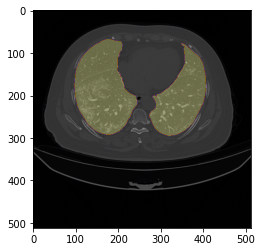

In [ ]:
# mask overlayed on top of orginal image
plt.imshow(image,cmap='gray')
plt.imshow(lung, cmap = 'inferno', alpha = 0.4)

In [ ]:
# computing dice score

import numpy as np


def dice_score(im1, im2):
    """
    Computes the Dice coefficient, a measure of set similarity.
    Parameters
    ----------
    im1 : array-like, bool
        Any array of arbitrary size. If not boolean, will be converted.
    im2 : array-like, bool
        Any other array of identical size. If not boolean, will be converted.
    Returns
    -------
    dice : float
        Dice coefficient as a float on range [0,1].
        Maximum similarity = 1
        No similarity = 0
        
    Notes
    -----
    The order of inputs for `dice` is irrelevant. The result will be
    identical if `im1` and `im2` are switched.
    """
    im1 = np.asarray(im1).astype(np.bool)
    im2 = np.asarray(im2).astype(np.bool)

    if im1.shape != im2.shape:
        raise ValueError("Shape mismatch: im1 and im2 must have the same shape.")

    # Compute Dice coefficient
    intersection = np.logical_and(im1, im2)

    return 2. * intersection.sum() / (im1.sum() + im2.sum())

In [ ]:
dice_score(sample_lung[...,120],lung)

0.989841495711293

In [ ]:
dice_score(sample_infe[...,120],infection1)

0.6216503496503496

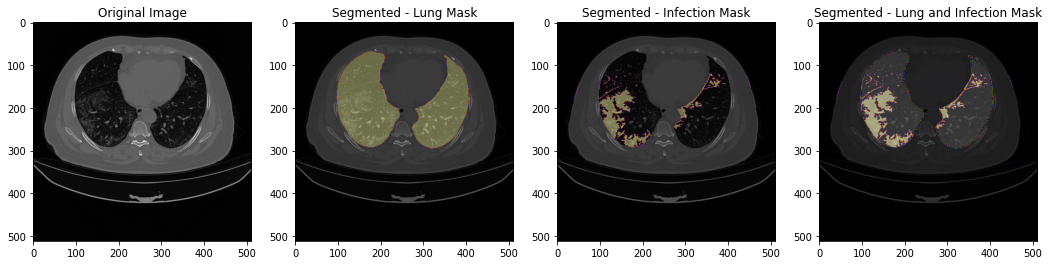

In [ ]:
fig = plt.figure(figsize=(18,15))
color_map = 'inferno'
plt.subplot(1,4,1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

plt.subplot(1,4,2)
plt.imshow(image, cmap='gray')
plt.imshow(lung, alpha=0.4, cmap=color_map)
plt.title('Segmented - Lung Mask')

plt.subplot(1,4,3)
plt.imshow(image, cmap='gray')
plt.imshow(infection1, alpha=0.4, cmap=color_map)
plt.title('Segmented - Infection Mask')

plt.subplot(1,4,4)
plt.imshow(image, cmap='gray')
plt.imshow(lung, alpha=0.4, cmap='nipy_spectral')
plt.imshow(infection1, alpha=0.4, cmap=color_map)
plt.title('Segmented - Lung and Infection Mask')

plt.show()

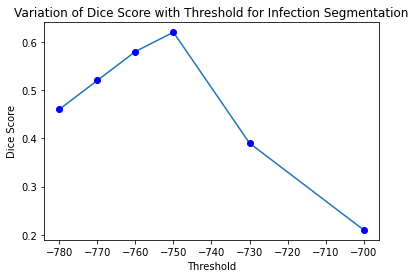

In [ ]:
# plotting variation of dice score with threshold for infection

import matplotlib.pyplot as plt

thresh = [-780, -770, -760, -750, -730, -700]
dice_inf = [0.46, 0.52, 0.58, 0.62, 0.39, 0.21]
plt.plot(thresh,dice_inf)
plt.plot(thresh,dice_inf,'bo')
plt.ylabel("Dice Score")
plt.xlabel("Threshold")
plt.title("Variation of Dice Score with Threshold for Infection Segmentation")
plt.savefig("plot_inf.jpg")
plt.show()

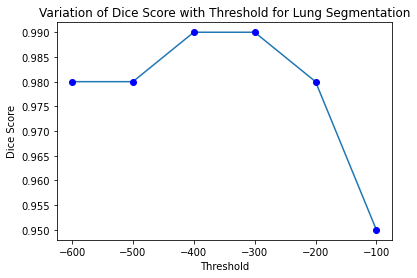

In [ ]:
# plotting variation of dice score with threshold for lungs

import matplotlib.pyplot as plt

thresh = [-600, -500, -400, -300, -200, -100]
dice_inf = [0.98, 0.98, 0.99, 0.99, 0.98, 0.95]
plt.plot(thresh,dice_inf)
plt.plot(thresh,dice_inf,'bo')
plt.ylabel("Dice Score")
plt.xlabel("Threshold")
plt.title("Variation of Dice Score with Threshold for Lung Segmentation")
plt.savefig("plot_lung.jpg")
plt.show()